In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier # k 근접 이웃
from sklearn.ensemble import RandomForestClassifier #  앙상블 랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [20]:
# roc curve 함수 정의
# fpr(false positive rate) : 특이도
# tpr(true positive rate) : 민감도, 재현율
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1],color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operation Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# 샘플 데이터 1000건 생성
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state = 1)

In [21]:
# train, test 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size = 0.3, random_state = 1)

# RandomForest 모델 적용
model = RandomForestClassifier()
model.fit(train_X, train_y) # fit은 반드시 train data로

# 테스트 데이터의 확률 예측
probs = model.predict_proba(test_X) 

In [22]:
print(model.predict_proba(test_X)[:5,:]) # 모델 예측 결과 확률

[[0.96 0.04]
 [0.06 0.94]
 [0.95 0.05]
 [0.95 0.05]
 [0.03 0.97]]


In [23]:
print(model.predict(test_X)) # 모델 예측 결과 값

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [24]:
# positive class만 유지
probs = probs[:,1]

# AUC
auc = roc_auc_score(test_y, probs)
print(auc)

0.9517070779105009


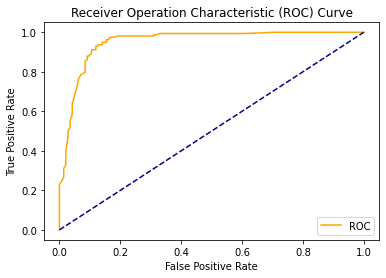

In [25]:
# ROC 곡선 확보
fpr, tpr, thresholds = roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)